Images has been preprocessed and just Y channel has been taken in account, reducing depth of inputs by a third. 

While normalization has been tried, it doesn't improves solution. Histogram equalization has been used over channel Y, and improved the solutions a lot.  

Describe model arquitecture. Optimizer. EPOCHS. Training. How we tested it. Tries. 

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib as mpl
import cv2 
from   skimage  import exposure 
#TODO: Fill this in based on where you saved the training and testing data
from IPython.display import clear_output

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

def obtain_Y(img_in):
    out = img_in[:,:,0] * 0.299 + img_in[:,:,1] * 0.587 + img_in[:,:,2] * 0.114
    out = (out / 255.).astype(np.float32)
    
    out =  exposure.equalize_hist(out)
    out  =  exposure.equalize_adapthist(out)
    clear_output()
    #out = (out - 128.0)/255.0
    #out = np.expand_dims(out, axis=3) 
    return out


25
25


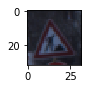

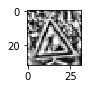

In [2]:
#Show an image

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

im_preprocessed = obtain_Y(image)


plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

plt.figure(figsize=(1,1))
plt.imshow(im_preprocessed, cmap="gray")
print(y_train[index])